# Assignment: Predicting temperature using data from Szeged, Hungary area. 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.

In [37]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [38]:
weather.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [39]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.

In [40]:
# X is the feature set we are feeding into the model
X = weather[['humidity', 'windspeed', 'windbearing', 'pressure']]
# Y is the target variable:
Y = weather['temperature']

# Creating a LinearRegression model object 
lrm = linear_model.LinearRegression()

# Fit method, to estimate the coefficients using OLS
lrm.fit(X,Y)

# Printing the results:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)



Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528538


In [41]:
lrm.score(X,Y)

0.4205778630374367

Using statsmodels: 

In [42]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        18:06:23   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking to see if model meets Gauss-Markov Condiditons:

1. Assumption: Linearity of model in its coefficients

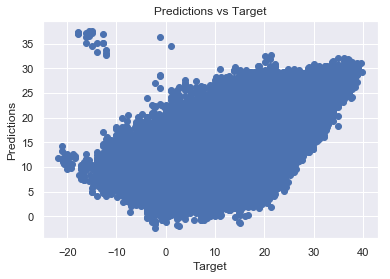

In [48]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
predictions = lrm.predict(X)

plt.scatter(Y, predictions)
plt.title('Predictions vs Target')
plt.xlabel('Target')
plt.ylabel('Predictions')
plt.show()

Looks like this model does not exhibit linearity with respect to the predictions and the target. 

2. Assumption two: the error term should be zero on average

In [45]:
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -6.374279891745197e-15


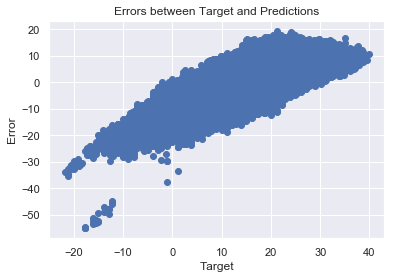

In [51]:
plt.scatter(x=Y, y=errors)
plt.title('Errors between Target and Predictions')
plt.xlabel('Target')
plt.ylabel('Error')
plt.show()

While the mean error looks pretty small, visualizng the target values with the corresponding errors from the predictions shows us that we are not accurately predicting. This assumption is in violation

3. Assumption three: Homoscedasticity. 
A model is homoscedastistic when the distribution of error terms is consistent for all predicted values. The error variance shouldnt change across observations. 

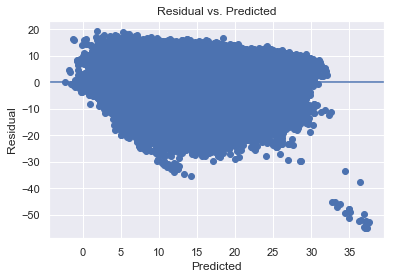

In [52]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

This visual representation shows that there is no consistent distribution of errors across the predicted values. Looks like the predicted values demonstrate **heteroscedasticity**

Using **Bartlett** and **Levene** tests, we can see if the values demonstrate homoscedasticity:

In [53]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.


4. Assumption 4: Low multicollinearity
Individual features should only be weakly correlated with each other, ideally not correlated at all. 

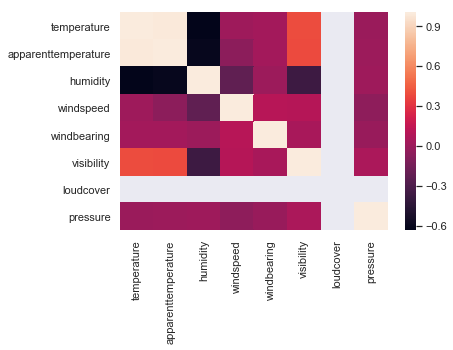

In [54]:
sns.heatmap(weather.corr())

Looks like our explanatory variables - humidity, windspeed, windbearing, and pressure do not exhibit high multicollinearity. 

5. Assumption five: error terms should be uncorrelated with one another. 

The error term for one observation shouldnt predict the error term for another. 

By graphing the error terms, we can observe whether the errors demonstrate randomness:

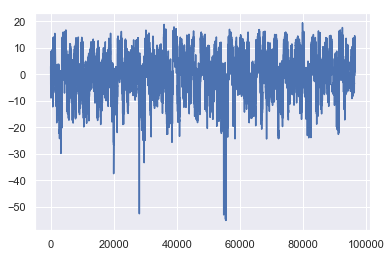

In [55]:
plt.plot(errors)
plt.show()

Looks like we have some spikes, demonstrating that we may not have a complete randomness in errors. 

We can use the **autocorrelation function** to compute the correlation of a variable with itself. In this case, the errors:

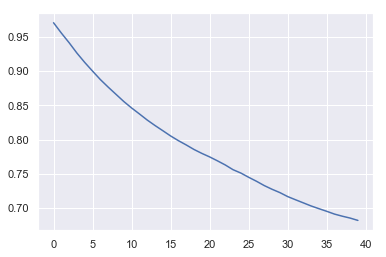

In [56]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation function between the errors of the temperature model ranges between 0.97 and 0.68.. seems high?

6. Assumption six: Exogeneity -  featurs shouldnt be correlated with the errors. 

The explanatory variables should be independent from the erros. 

There are various ways to check for normality of error terms. An informal way of doing this is by visualizing the errors in a QQ plot or to look at the histogram:

Text(0.5, 1.0, 'Histogram of the errors')

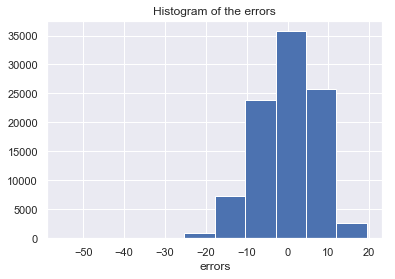

In [58]:
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

From this diagram, it looks like our errors are normally distributed. 

To further validate whether the errors are distributed normally, we can use the **Jarque Bera** and **Normal** tests:

(the null hypothesis of both tests is that the errors are normally distributed)

In [59]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [60]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252436 and p value is 0.0
Normality test statistics is 3375.4323076996443 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.